In [24]:
import matplotlib.pyplot as plt
import requests
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
#import datetime as dt
import pytz
from pprint import pprint


In [25]:
onecall = True  # 8 days
#onecall = False # 5 days

In [26]:

def get_location(city='paris',API_Key = 'edffd1bf975a74d5d10e58c5ac8be2d3'):
    base_url = 'http://api.openweathermap.org/data/2.5/weather?appid='+API_Key+'&q='+city
    current = requests.get(base_url).json()
    lat = current['coord']['lat']
    lon = current['coord']['lon']
    return lat,lon

def human_date(d):
   #return datetime.fromtimestamp(d, pytz.timezone('Europe/Paris')).strftime('%d/%m/%Y %H:%M:%S')
   return datetime.fromtimestamp(d, pytz.timezone('Europe/Paris')).strftime('%d/%m %H:%M')

def get_date(timestamp):
    return human_date(timestamp).split(' ')[0]

def get_time(timestamp):
    return human_date(timestamp).split(' ')[1]

def print_day(n):
    pprint(onecall_data['daily'][n])


# 8 days forecast


In [27]:

API_Key = 'edffd1bf975a74d5d10e58c5ac8be2d3'
lat, lon = get_location()
base_url = 'https://api.openweathermap.org/data/2.5/onecall?lat='+str(lat)+'&lon='+str(lon)+'&units=metric&exclude=hourly,minutely&appid='+API_Key
data_for = '8 days'
# request data
try:
    print('Requesting json data')
    onecall_data = requests.get(base_url).json()
    #print(onecall_data)
except:
    exit()

Requesting json data


In [28]:
# make dataframe and save
print('Creating dataframe: ', data_for)

df = onecall_data['daily']
l = len(df[0])


Creating dataframe:  8 days


In [29]:
_8days = pd.DataFrame.from_records(df)
print('Converting timestamp to human date')
for k in _8days.keys()[:5]:
    #print(k)
    if k=='dt':  # date for dt
        _8days[k] = _8days[k].apply(get_date)
    else:        # time for other columns
        _8days[k] = _8days[k].apply(get_time)            
_8days

Converting timestamp to human date


,dt,sunrise,sunset,moonrise,moonset,moon_phase,temp,feels_like,pressure,humidity,dew_point,wind_speed,wind_deg,wind_gust,weather,clouds,pop,rain,uvi
0,16/08,06:45,21:04,19:39,01:51,0.38,"{'day': 25.76, 'min': 19.18, 'max': 25.76, 'ni...","{'day': 25.75, 'night': 23.13, 'eve': 25.34, '...",1017,52,15.16,4.50,232,8.59,"[{'id': 500, 'main': 'Rain', 'description': 'l...",93,0.20,0.11,5.60
1,17/08,06:46,21:02,20:20,03:01,0.41,"{'day': 24.28, 'min': 19.11, 'max': 25.85, 'ni...","{'day': 24.23, 'night': 19.32, 'eve': 22.49, '...",1014,56,15.00,3.51,304,6.58,"[{'id': 501, 'main': 'Rain', 'description': 'm...",99,1.00,6.36,4.44
2,18/08,06:48,21:01,20:51,04:23,0.45,"{'day': 21.49, 'min': 15.65, 'max': 25.28, 'ni...","{'day': 20.84, 'night': 19.19, 'eve': 23.29, '...",1016,44,8.73,4.74,317,7.90,"[{'id': 804, 'main': 'Clouds', 'description': ...",97,0.80,NaN,5.58
3,19/08,06:49,20:59,21:15,05:52,0.50,"{'day': 24.12, 'min': 16.24, 'max': 27.18, 'ni...","{'day': 23.42, 'night': 22.18, 'eve': 26.08, '...",1018,32,6.62,2.92,187,6.26,"[{'id': 802, 'main': 'Clouds', 'description': ...",37,0.00,NaN,5.62
4,20/08,06:50,20:57,21:34,07:22,0.52,"{'day': 24.87, 'min': 19.47, 'max': 24.87, 'ni...","{'day': 24.59, 'night': 19.8, 'eve': 22.76, 'm...",1014,45,12.10,3.78,238,8.23,"[{'id': 500, 'main': 'Rain', 'description': 'l...",78,1.00,2.40,2.30
5,21/08,06:52,20:55,21:50,08:49,0.56,"{'day': 21.55, 'min': 15.49, 'max': 23.05, 'ni...","{'day': 20.75, 'night': 18.98, 'eve': 21.33, '...",1018,38,6.37,3.40,304,7.84,"[{'id': 804, 'main': 'Clouds', 'description': ...",99,0.88,NaN,3.00
6,22/08,06:53,20:53,22:06,10:16,0.60,"{'day': 24.89, 'min': 16.59, 'max': 27.14, 'ni...","{'day': 24.43, 'night': 22.83, 'eve': 25.97, '...",1018,38,9.47,2.00,154,4.88,"[{'id': 803, 'main': 'Clouds', 'description': ...",57,0.00,NaN,3.00
7,23/08,06:55,20:51,22:23,11:42,0.64,"{'day': 28.35, 'min': 19.22, 'max': 30.63, 'ni...","{'day': 27.46, 'night': 26.18, 'eve': 28.38, '...",1013,32,10.16,3.19,203,5.85,"[{'id': 800, 'main': 'Clear', 'description': '...",5,0.00,NaN,3.00


In [30]:
_8days.keys(), len(_8days.keys())

(Index(['dt', 'sunrise', 'sunset', 'moonrise', 'moonset', 'moon_phase', 'temp',
        'feels_like', 'pressure', 'humidity', 'dew_point', 'wind_speed',
        'wind_deg', 'wind_gust', 'weather', 'clouds', 'pop', 'rain', 'uvi'],
       dtype='object'),
 19)

In [31]:

print('Selecting columns')
# select multiple column ranges
focus = np.r_[:6, 8:14, 16:l]
focus_idx = _8days.keys()[focus]

status2 = pd.DataFrame(_8days[focus_idx])
demain = status2.loc[1]

demain

Selecting columns


dt            17/08
sunrise       06:46
sunset        21:02
moonrise      20:20
moonset       03:01
moon_phase     0.41
pressure       1014
humidity         56
dew_point      15.0
wind_speed     3.51
wind_deg        304
wind_gust      6.58
pop             1.0
rain           6.36
uvi            4.44
Name: 1, dtype: object

In [32]:
focus

array([ 0,  1,  2,  3,  4,  5,  8,  9, 10, 11, 12, 13, 16, 17, 18])

In [33]:
# zip and save
print('Save to CSV')
compression_opts = dict(method='zip', archive_name='demain.csv')
demain.to_csv('demain.zip', index=False, compression=compression_opts)
# no compression 
demain.to_csv('demain.csv')
#pprint(onecall_data)
print(_8days.iloc[0])  # today


Save to CSV
dt                                                        16/08
sunrise                                                   06:45
sunset                                                    21:04
moonrise                                                  19:39
moonset                                                   01:51
moon_phase                                                 0.38
temp          {'day': 25.76, 'min': 19.18, 'max': 25.76, 'ni...
feels_like    {'day': 25.75, 'night': 23.13, 'eve': 25.34, '...
pressure                                                   1017
humidity                                                     52
dew_point                                                 15.16
wind_speed                                                  4.5
wind_deg                                                    232
wind_gust                                                  8.59
weather       [{'id': 500, 'main': 'Rain', 'description': 'l...
clouds                      

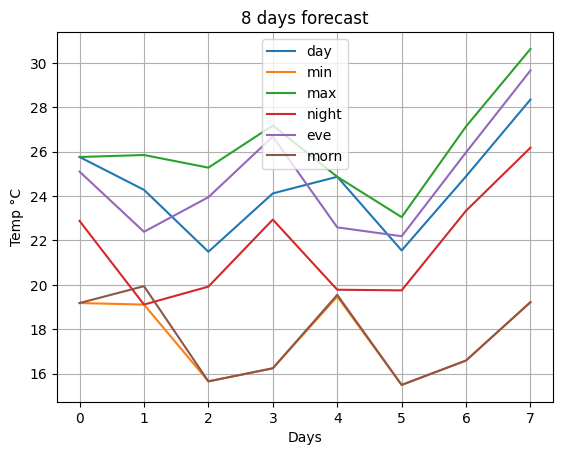

In [34]:
# plot temperature
l = []
for i in range(0,8):
    l.append(_8days.iloc[i].temp)

df = pd.DataFrame(l)
df.plot()
plt.title('8 days forecast')
plt.ylabel('Temp °C')
plt.xlabel('Days')
plt.grid()
plt.show()

   
# 5 days forecast


In [35]:

API_Key = '56040ff66d50184c81a4df3a770657e3'
#API_Key = '42a2df3beefb73f7161413a3f5a53f2a'
lat, lon = get_location(API_Key=API_Key)
base_url = 'https://api.openweathermap.org/data/2.5/forecast?lat='+str(lat)+'&lon='+str(lon)+'&units=metric&exclude=hourly,minutely&appid='+API_Key
data_for = '5 days'
try:
    print('Requesting json data')
    forecast = requests.get(base_url).json()
    print(forecast)
except:
    exit()


Requesting json data
{'cod': '200', 'message': 0, 'cnt': 40, 'list': [{'dt': 1723831200, 'main': {'temp': 25.29, 'feels_like': 25.55, 'temp_min': 23.79, 'temp_max': 25.29, 'pressure': 1015, 'sea_level': 1015, 'grnd_level': 1005, 'humidity': 64, 'temp_kf': 1.5}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'clouds': {'all': 100}, 'wind': {'speed': 2.56, 'deg': 284, 'gust': 4.25}, 'visibility': 10000, 'pop': 0.34, 'rain': {'3h': 0.1}, 'sys': {'pod': 'd'}, 'dt_txt': '2024-08-16 18:00:00'}, {'dt': 1723842000, 'main': {'temp': 24.3, 'feels_like': 24.56, 'temp_min': 22.32, 'temp_max': 24.3, 'pressure': 1015, 'sea_level': 1015, 'grnd_level': 1006, 'humidity': 68, 'temp_kf': 1.98}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'clouds': {'all': 95}, 'wind': {'speed': 1.81, 'deg': 240, 'gust': 4.92}, 'visibility': 10000, 'pop': 0.2, 'rain': {'3h': 0.14}, 'sys': {'pod': 'n'}, 'dt_txt': '2024-08-16 21:00:00'}, {'dt':

In [36]:
# make dataframe and save
print('Creating dataframe: ', data_for)

df = forecast['list']
_5days = pd.DataFrame.from_records(df)
print(_5days.iloc[0])


Creating dataframe:  5 days
dt                                                   1723831200
main          {'temp': 25.29, 'feels_like': 25.55, 'temp_min...
weather       [{'id': 500, 'main': 'Rain', 'description': 'l...
clouds                                             {'all': 100}
wind                  {'speed': 2.56, 'deg': 284, 'gust': 4.25}
visibility                                                10000
pop                                                        0.34
rain                                                {'3h': 0.1}
sys                                                {'pod': 'd'}
dt_txt                                      2024-08-16 18:00:00
Name: 0, dtype: object


In [37]:
_5days.keys()


Index(['dt', 'main', 'weather', 'clouds', 'wind', 'visibility', 'pop', 'rain',
       'sys', 'dt_txt'],
      dtype='object')

In [38]:
_5days['date'] = _5days['dt'].apply(get_date)
_5days['human_date'] = _5days['dt'].apply(human_date)
_5days['time'] = _5days['dt'].apply(get_time)
main = pd.DataFrame.from_records(_5days['main'])
_5days = pd.concat([_5days,main],axis=1)

print(_5days[['human_date', 'time', 'temp_max','temp_min']])


     human_date   time  temp_max  temp_min
0   16/08 20:00  20:00     25.29     23.79
1   16/08 23:00  23:00     24.30     22.32
2   17/08 02:00  02:00     22.68     21.37
3   17/08 05:00  05:00     19.83     19.83
4   17/08 08:00  08:00     20.02     20.02
5   17/08 11:00  11:00     20.84     20.84
6   17/08 14:00  14:00     25.85     25.85
7   17/08 17:00  17:00     25.14     25.14
8   17/08 20:00  20:00     20.98     20.98
9   17/08 23:00  23:00     19.11     19.11
10  18/08 02:00  02:00     17.72     17.72
11  18/08 05:00  05:00     16.41     16.41
12  18/08 08:00  08:00     15.71     15.71
13  18/08 11:00  11:00     19.05     19.05
14  18/08 14:00  14:00     22.96     22.96
15  18/08 17:00  17:00     25.28     25.28
16  18/08 20:00  20:00     22.93     22.93
17  18/08 23:00  23:00     19.92     19.92
18  19/08 02:00  02:00     17.99     17.99
19  19/08 05:00  05:00     16.66     16.66
20  19/08 08:00  08:00     16.61     16.61
21  19/08 11:00  11:00     21.08     21.08
22  19/08 1

In [39]:
_5days['human_date']

0     16/08 20:00
1     16/08 23:00
2     17/08 02:00
3     17/08 05:00
4     17/08 08:00
5     17/08 11:00
6     17/08 14:00
7     17/08 17:00
8     17/08 20:00
9     17/08 23:00
10    18/08 02:00
11    18/08 05:00
12    18/08 08:00
13    18/08 11:00
14    18/08 14:00
15    18/08 17:00
16    18/08 20:00
17    18/08 23:00
18    19/08 02:00
19    19/08 05:00
20    19/08 08:00
21    19/08 11:00
22    19/08 14:00
23    19/08 17:00
24    19/08 20:00
25    19/08 23:00
26    20/08 02:00
27    20/08 05:00
28    20/08 08:00
29    20/08 11:00
30    20/08 14:00
31    20/08 17:00
32    20/08 20:00
33    20/08 23:00
34    21/08 02:00
35    21/08 05:00
36    21/08 08:00
37    21/08 11:00
38    21/08 14:00
39    21/08 17:00
Name: human_date, dtype: object

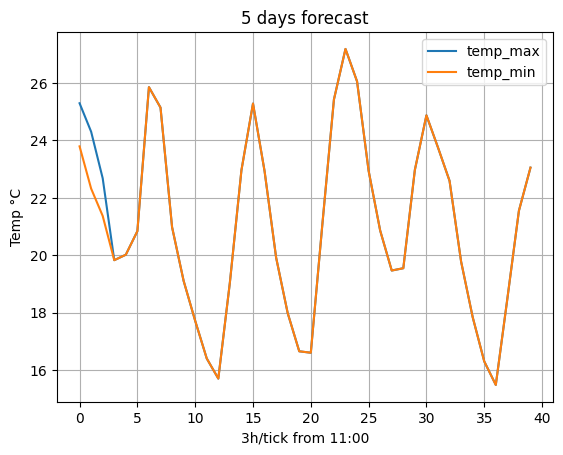

In [40]:
# plot
_5days[['temp_max','temp_min']].plot()
plt.title('5 days forecast')
plt.ylabel('Temp °C')
plt.xlabel('3h/tick from 11:00')
plt.grid()
plt.show()
    

In [41]:
# pip install seaborn
import seaborn as sns

[Text(0.5, 0, 'day+hour'),
 Text(0, 0.5, 'temp °C'),
 Text(0.5, 1.0, '5 days forecast')]

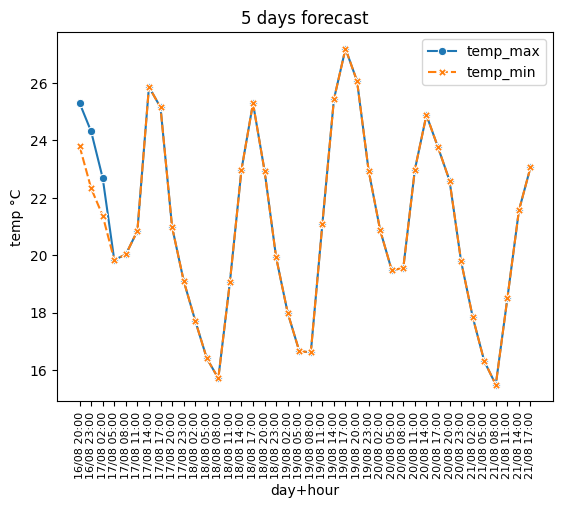

In [42]:
# plot 5 days temp for every 3 hours tick
df1 = pd.DataFrame(_5days[['human_date','temp_max','temp_min']]) 
df1 = df1.set_index('human_date')
df1
ax= sns.lineplot(data=df1, markers= True)
plt.xticks(rotation=90, fontsize=8)
ax.set(xlabel='day+hour', ylabel='temp °C', title='5 days forecast') 

[Text(0.5, 0, 'time (hours)'),
 Text(0, 0.5, 'temp °C'),
 Text(0.5, 1.0, '5 days forecast')]

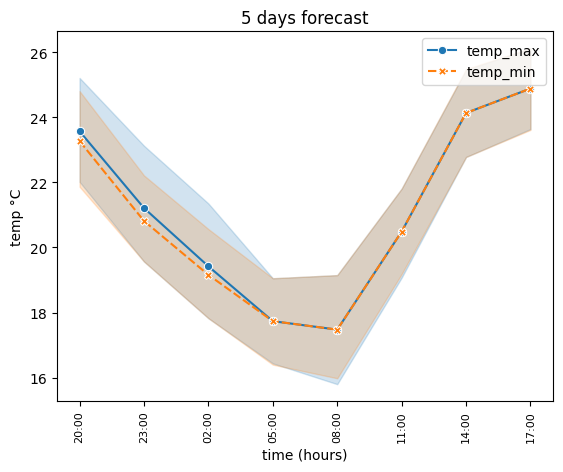

In [43]:
# index on hours get 5 days hour window variation
df2 = pd.DataFrame(_5days[['time','temp_max','temp_min']]) 
df2
df2 = df2.set_index('time')
df2
ax= sns.lineplot(data=df2, markers= True)
plt.xticks(rotation=90, fontsize=8)
ax.set(xlabel='time (hours)', ylabel='temp °C', title='5 days forecast') 